<a href="https://colab.research.google.com/github/hariskhan-hk/Churn_pred/blob/main/app/notebooks/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [3]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error, recall_score, classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [4]:
tel_df = pd.read_csv('/content/Cleaned_Telecom_Dataset_New.csv')
tel_df = tel_df.drop('Unnamed: 0', axis=1)
tel_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_No,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0,53.85,108.15,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(tel_df.drop(['Churn'], axis=1))
scaled_features = scaler.transform(tel_df.drop('Churn', axis=1))


## Feature Selection

In [6]:
X = scaled_features
y = tel_df['Churn']

## Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# With Python Package

In [8]:
# Model Training
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Mean Squared Error

In [9]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.2104265402843602


## Accuracy & Other Metrics

In [10]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0, 1]))

Accuracy: 0.7895734597156399
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.65      0.44      0.53       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



## Confusion Matrix

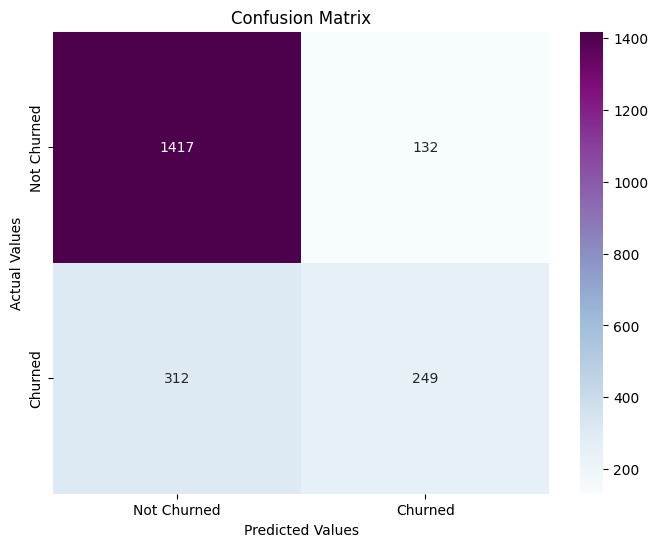

In [11]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, cmap='BuPu', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.xticks([0.5, 1.5], ['Not Churned', 'Churned'])
plt.yticks([0.5, 1.5], ['Not Churned', 'Churned'])
plt.show()


we should focus on recall, precision, and the F1 score for the minority class. It's clear that the precision, recall, and F1 score for Class 1 (churned customers) are very low.

Therefore, we will use SMOTEENN (Over Sampling + ENN) to address this issue.

## SMOTEENN

In [12]:
sm = SMOTE(random_state=42)
sm = SMOTEENN(smote=sm)
X_resampled, y_resampled = sm.fit_resample(X, y)

## Train Test Split

In [13]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

## Model Training with Resampled Data

In [14]:
model_rf_smote = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(Xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [15]:
# Predictions with Resampled Data
yr_pred = model_rf_smote.predict(Xr_test)

## Mean Squared Error

In [16]:
mse_smote = mean_squared_error(yr_test, yr_pred)
print('Mean Squared Error with SMOTEENN:', mse_smote)

Mean Squared Error with SMOTEENN: 0.0767236910316226


## Accuracy and other metrics

In [17]:
print('Accuracy with SMOTEENN:', accuracy_score(yr_test, yr_pred))
print(classification_report(yr_test, yr_pred))

Accuracy with SMOTEENN: 0.9232763089683774
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       881
           1       0.91      0.95      0.93      1048

    accuracy                           0.92      1929
   macro avg       0.92      0.92      0.92      1929
weighted avg       0.92      0.92      0.92      1929



# Confusion Matrix with Resampled Data

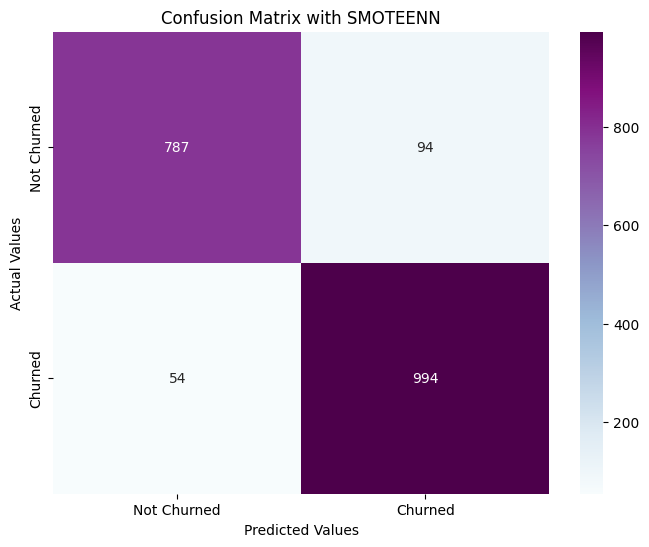

In [18]:
confusion_matrix_rf_smote = confusion_matrix(yr_test, yr_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf_smote, annot=True, cmap='BuPu', fmt='g')
plt.title('Confusion Matrix with SMOTEENN')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.xticks([0.5, 1.5], ['Not Churned', 'Churned'])
plt.yticks([0.5, 1.5], ['Not Churned', 'Churned'])
plt.show()


Now we can see quite better results, i.e. Accuracy: 93% approximately.

# WITHOUT PYTHON PACKAGE

In [19]:
class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or num_classes == 1:
            return {'leaf': True, 'class': np.argmax(np.bincount(y))}

        best_split = None
        best_gain = 0.0

        # Calculating the entropy of the current node (whole dataset)
        current_entropy = self._entropy(y)

        # Iterating over each feature to find the best split
        for feature_idx in range(num_features):
            feature_values = np.unique(X[:, feature_idx])

            if len(feature_values) > 10:  # Assuming a feature is continuous if it has more than 10 unique values
                # Continuous feature (Reduction of Variance for Splitting point)
                sorted_idx = np.argsort(X[:, feature_idx])
                for i in range(1, len(sorted_idx)):
                    if X[sorted_idx[i], feature_idx] != X[sorted_idx[i - 1], feature_idx]:
                        split_value = (X[sorted_idx[i], feature_idx] + X[sorted_idx[i - 1], feature_idx]) / 2.0
                        X_left, y_left, X_right, y_right = self._split_continuous(X, y, feature_idx, split_value)
                        gain = self._variance_reduction(y, y_left, y_right)
                        if gain > best_gain:
                            best_gain = gain
                            best_split = {'feature_idx': feature_idx, 'split_value': split_value,
                                          'X_left': X_left, 'y_left': y_left,
                                          'X_right': X_right, 'y_right': y_right}
            else:
                # Categorical feature
                for value in feature_values:
                    X_subset, y_subset = self._split_categorical(X, y, feature_idx, value)
                    # here current_entropy represents total info gain of particular dataset, y_subset is splited labels, y[~(X[:, feature_idx] == value)] = y - y_subset
                    gain = self._information_gain(current_entropy, [y_subset, y[~(X[:, feature_idx] == value)]])
                    if gain > best_gain:
                        best_gain = gain
                        best_split = {'feature_idx': feature_idx, 'value': value,
                                      'X_subset': X_subset, 'y_subset': y_subset}

        if best_split is None:
            return {'leaf': True, 'class': np.argmax(np.bincount(y))}

        if 'split_value' in best_split:
            # Continuous split
            left_subtree = self._grow_tree(best_split['X_left'], best_split['y_left'], depth + 1)
            right_subtree = self._grow_tree(best_split['X_right'], best_split['y_right'], depth + 1)
            return {'leaf': False, 'feature_idx': best_split['feature_idx'],
                    'split_value': best_split['split_value'],
                    'left': left_subtree, 'right': right_subtree}
        else:
            # Categorical split
            remaining_X = X[~(X[:, best_split['feature_idx']] == best_split['value'])]
            remaining_y = y[~(X[:, best_split['feature_idx']] == best_split['value'])]
            subset_tree = self._grow_tree(best_split['X_subset'], best_split['y_subset'], depth + 1)
            remaining_tree = self._grow_tree(remaining_X, remaining_y, depth + 1)
            return {'leaf': False, 'feature_idx': best_split['feature_idx'], 'value': best_split['value'],
                    'subset': subset_tree, 'remaining': remaining_tree}

    def _entropy(self, y):
        x, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))

    def _information_gain(self, parent_entropy, subsets):
        total = sum(len(subset) for subset in subsets)
        gain = parent_entropy - sum((len(subset) / total) * self._entropy(subset) for subset in subsets)
        return gain

    def _split_categorical(self, X, y, feature_idx, value):
        mask = X[:, feature_idx] == value
        return X[mask], y[mask]

    def _variance_reduction(self, parent, left, right):
        total_var = np.var(parent)
        left_var = np.var(left) if len(left) > 0 else 0
        right_var = np.var(right) if len(right) > 0 else 0
        total_size = len(left) + len(right)
        reduction = total_var - ((len(left) / total_size) * left_var + (len(right) / total_size) * right_var)
        return reduction

    def _split_continuous(self, X, y, feature_idx, split_value):
        mask_left = X[:, feature_idx] <= split_value
        mask_right = X[:, feature_idx] > split_value
        return X[mask_left], y[mask_left], X[mask_right], y[mask_right]

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, node):
        if node['leaf']:
            return node['class']
        else:
            if 'split_value' in node:
                # Continuous split
                if x[node['feature_idx']] <= node['split_value']:
                    return self._predict_tree(x, node['left'])
                else:
                    return self._predict_tree(x, node['right'])
            else:
                # Categorical split
                if x[node['feature_idx']] == node['value']:
                    return self._predict_tree(x, node['subset'])
                else:
                    return self._predict_tree(x, node['remaining'])

## Model Training

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

clf = CustomDecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
yr_test_report = np.array(yr_test)
pred_report = np.array(yr_pred)

counts = {
    'TP': {0: 0, 1: 0},
    'FP': {0: 0, 1: 0},
    'TN': {0: 0, 1: 0},
    'FN': {0: 0, 1: 0}
}

for yt, yp in zip(yr_test_report, pred_report):
    if yt == yp:
        counts['TP'][yt] += 1
        counts['TN'][1 - yt] += 1
    else:
        counts['FP'][yp] += 1
        counts['FN'][yt] += 1

# Initialize metrics
metrics = {
    'precision': {0: 0, 1: 0},
    'recall': {0: 0, 1: 0},
    'f1_score': {0: 0, 1: 0},
    'accuracy': 0
}

# Calculate Precision, Recall, and F1 Score for both classes
for cls in [0, 1]:
    TP = counts['TP'][cls]
    FP = counts['FP'][cls]
    FN = counts['FN'][cls]
    TN = counts['TN'][cls]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics['precision'][cls] = precision
    metrics['recall'][cls] = recall
    metrics['f1_score'][cls] = f1_score

# Calculate overall accuracy correctly
total_correct = sum(counts['TP'].values())  # Only sum true positives for both classes
total_predictions = len(yr_test)  # Total predictions (both classes)
metrics['accuracy'] = total_correct / total_predictions

print(f"Accuracy: {metrics['accuracy']}")
print(f"Precision for class 0: {metrics['precision'][0]}")
print(f"Recall for class 0: {metrics['recall'][0]}")
print(f"F1 Score for class 0: {metrics['f1_score'][0]}")
print(f"Precision for class 1: {metrics['precision'][1]}")
print(f"Recall for class 1: {metrics['recall'][1]}")
print(f"F1 Score for class 1: {metrics['f1_score'][1]}")

Accuracy: 0.9232763089683774
Precision for class 0: 0.9357907253269917
Recall for class 0: 0.8933030646992054
F1 Score for class 0: 0.9140534262485481
Precision for class 1: 0.9136029411764706
Recall for class 1: 0.9484732824427481
F1 Score for class 1: 0.9307116104868913


In [22]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_array, check_X_y

class RandomForestClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2,
                 max_features='sqrt', bootstrap=True, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.n_features_ = X.shape[1]

        if isinstance(self.max_features, str):
            if self.max_features == 'sqrt':
                self.max_features_ = int(np.sqrt(self.n_features_))
            elif self.max_features == 'log2':
                self.max_features_ = int(np.log2(self.n_features_))
            else:
                raise ValueError("Unsupported max_features string")
        elif isinstance(self.max_features, float):
            self.max_features_ = int(self.max_features * self.n_features_)
        else:
            self.max_features_ = self.max_features

        for _ in range(self.n_estimators):
            tree = CustomDecisionTreeClassifier(max_depth=self.max_depth)
            if self.bootstrap:
                n_samples = X.shape[0]
                indices = np.random.choice(n_samples, n_samples, replace=True)
                sample_X = X[indices]
                sample_y = y[indices]
            else:
                sample_X, sample_y = X, y

            feature_indices = np.random.choice(self.n_features_, self.max_features_, replace=False)
            tree.fit(sample_X[:, feature_indices], sample_y)
            self.trees.append((tree, feature_indices))

        return self

    def predict(self, X):
        check_array(X)
        predictions = np.array([tree.predict(X[:, indices]) for tree, indices in self.trees])
        return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)


rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)

# Before SMOTEENN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Compute metrics
print("Before SMOTEENN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# After SMOTEENN
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
rf_clf.fit(Xr_train, yr_train)
yr_pred = rf_clf.predict(Xr_test)

# Compute metrics
print("\nAfter SMOTEENN")
print(f"Accuracy: {accuracy_score(yr_test, yr_pred)}")
print(classification_report(yr_test, yr_pred))

Before SMOTEENN
Accuracy: 0.7786729857819905
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1549
           1       0.79      0.23      0.36       561

    accuracy                           0.78      2110
   macro avg       0.78      0.60      0.61      2110
weighted avg       0.78      0.78      0.73      2110


After SMOTEENN
Accuracy: 0.8854328667703474
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       881
           1       0.98      0.80      0.88      1048

    accuracy                           0.89      1929
   macro avg       0.90      0.89      0.89      1929
weighted avg       0.90      0.89      0.89      1929

